In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

### Regresión Logística

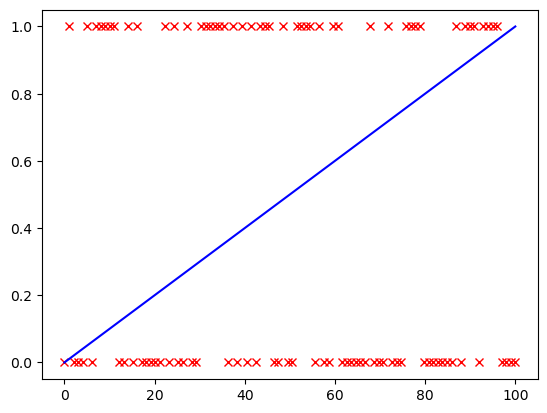

In [2]:
X=np.random.choice([0,1],100)
x=np.linspace(0,100,100)
y=x/100
plt.plot(x,X,'rx',x,y,'b')
plt.show()

Nosotros vamos a querer romper una cierta recta de regresión para que logremos a partir de cierto punto asociar a los valores 0's y 1's

La primera idea para relajar un poco las restricciones sería de asociar la variable $Y$ a una probabilidad $P$ es decir tener 

$$P=\alpha X +\beta$$

Para solucionar de restricción de probabilidades $0\leq P \leq 1$ podemos colocar

$$\frac{P}{1-P}=\alpha X+\beta$$

Tenemos entonces para acentuar la idea

$$\ln \left( \frac{P}{1-P}\right)=\alpha X +\beta$$

Despejando $P$

$$\frac{P}{1-P}=e^{\alpha X+\beta}$$

$$P+e^{\alpha X+\beta}P=e^{\alpha X+\beta}$$

$$P=\frac{e^{\alpha X+\beta}}{1+e^{\alpha X+\beta}}$$

Lo que de forma equivalente nos da

$$P=\frac{1}{1+e^{-(\alpha X +\beta)}}$$

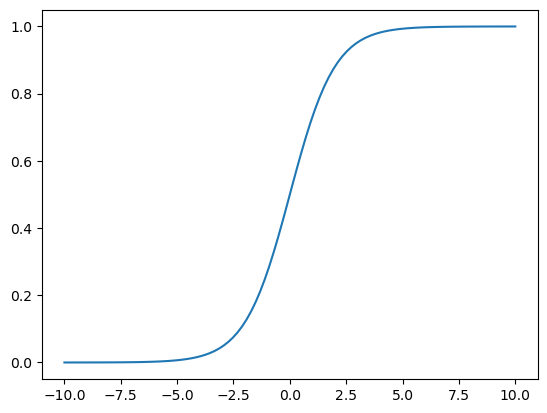

In [3]:
x=np.linspace(-10,10,100)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.show()

Este sería nuestro primer modelo de regresión logística.

Para la selección podemos escoger 

* $Y=0$ si $P<0.5$ 
* $Y=1$ si $P\geq 0.5$

En caso de tener varias variables explicativas nuestro modelo sería 

$$P=\frac{1}{1+e^{-(\sum_{i=1}^n \alpha_i X_i +\beta)}}$$

¿Como determinamos los valores $\alpha_i$ y $\beta$?

Vamos a determinar los valores de $\alpha_i$ y $\beta$ por el método de máximo de verosimilitud

Consideremos los coeficientes $\alpha_i$ como un vector $\alpha$ y similarmente las columnas de $X$ para cada fila que llamaremos $X_i$ 

Entonces para cada fila tendriamos

$$P_i=\frac{1}{1+e^{-\alpha \cdot X_i -\beta}}$$

Por lo tanto tenemos

$$1-P_i=1-\frac{1}{1+e^{-\alpha \cdot X_i -\beta}}=\frac{1+e^{-\alpha \cdot X_i -\beta}-1}{1+e^{-\alpha \cdot X_i -\beta}}=\frac{1}{1+e^{\alpha \cdot X_i +\beta}}$$

Consideremos la función de verosimilitud 

$$L=\prod_{i=1}^n P_i^{Y_i}(1-P_i)^{1-Y_i}$$

En vez de optimizar la función $L$ vamos a optimizar la función

$$l=\ln(L)$$

$$l=\sum_{i=1}^n Y_i \ln(P_i)+(1-Y_i)\ln(1-P_i)$$

De donde 

$$l=\sum_{i=1}^n \ln(1-P_i)+Y_i(\ln(P_i)-\ln(1-P_i))$$

Simplificando

$$l=\sum_{i=1}^n \ln(1-P_i)+Y_i\ln \left(\frac{P_i}{1-P_i}\right)$$

Reemplazando las igualdades que tenemos

$$l=\sum_{i=1}^n-\ln(1+e^{\alpha X_i+\beta})+Y_i(\alpha X_i+\beta)$$

Para optimizar necesitamos que todas las derivadas sean iguales a 0.

$$\frac{\partial l}{\partial \alpha_j}=\frac{\partial l}{\partial \beta}=0$$

Calculando las derivadas tenemos

$$\frac{\partial l}{\partial \beta}=\sum_{i=1}^n -\frac{e^{\alpha X_i+\beta}}{1+e^{\alpha X_i+\beta}}+Y_i=\sum_{i=1}^n Y_i-P_i$$

Haciendo para $\alpha_i$ tenemos

$$\frac{\partial l}{\partial \alpha_j}=\sum_{i=1}^n-\frac{X_{ij}e^{\alpha X_i+\beta}}{1+e^{\alpha X_i+\beta}}+Y_iX_{ij}$$

De donde

$$\frac{\partial l}{\partial \alpha_j}=\sum_{i=1}^n X_{ij}(Y_i-P_i)$$

Si ponemos $\alpha_0:=\beta$ y $X_{i0}=1, \forall i=\{1,2,...,n\}$ tenemos
    
$$\frac{\partial l}{\partial \alpha_j}=\sum_{i=0}^n X_{ij}(Y_i-P_i)$$

Convirtiendo en forma vectorial tenemos

$$\frac{\partial l}{\partial \alpha_j}=X_{j}^T(Y-P)$$

con $Y$ y $P$ los vectores de $Y_i$ y $P_i$

Que simplificando en forma matricial tenemos

$$\frac{d l}{d \alpha}=X^T(Y-P)$$

Tambien vamos a estar interesados en 

$$\frac{\partial P_i}{\partial \alpha_j}=\frac{\partial}{\partial \alpha_j}\frac{1}{1+e^{-\alpha X_i}}=\frac{-e^{-\alpha X_i}}{(1+e^{-\alpha X_i})^2}X_{ij}$$

$$\frac{\partial P_i}{\partial \alpha_j}=-P_i(1-P_i)X_{ij}$$

Hemos calculado lo anterior porque queremos

$$\frac{\partial^2 l}{\partial \alpha_j^2}=\sum_{i=0}^n-X_{ij}\frac{\partial P_i}{\partial \alpha_j}$$

De donde 

$$\frac{\partial^2 l}{\partial \alpha_j^2}=\sum_{i=0}^nX_{ij}P_i(1-P_i)X_{ij}$$

En forma vectorial tenemos

$$\frac{\partial^2 l}{\partial \alpha_j^2}=X_iP_i(1-P_i)X_i^T$$

De donde 

$$\frac{\partial^2 l}{\partial \alpha}=XWX^T$$

con $W=diag(P_i(1-P_i))$

Ahora lo que queremos es 

$$\frac{\partial l}{\partial \alpha}=0$$

Para encontrar estas raices multidimensionales vamos a utilizar el método de Newton.

Recordando el método de Newton

$$x_{n+1}=x_n+\frac{f(x_n)}{f'(x_n)}$$

In [4]:
from IPython.display import Image

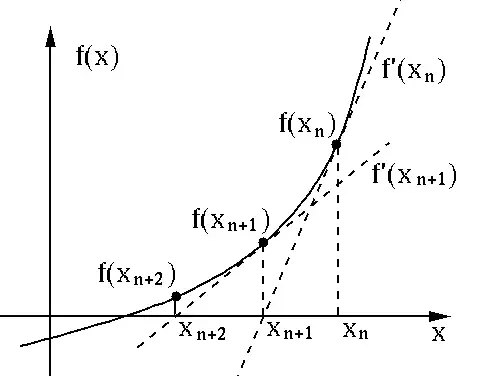

In [5]:
Image('NewtonRaphson.jpg')

Transformando la ecuación anterior en Multidimensional tenemos

$$X_{n+1}=X_n+(f')^{-1}(X_n)f(X_n)$$

Aplicandolo a nuestro problema tenemos

$$\alpha^{n+1}=\alpha^n+(f')^{-1}(\alpha^n)f(\alpha^n)$$

donde el exponente representa el número de iteración y $f=\frac{\partial l}{\partial \alpha}$ y $f'=\frac{\partial^2 l}{\partial \alpha^2 }$

Lo que reemplazando nos daría

$$\alpha^{n+1}=\alpha^n+(XW(\alpha^n)X^T)^{-1}(X^T(Y-P(\alpha^n)))$$

* Definir L (función de maximo de Verosimilitud)
* Definir una función que calcule los Pi en función del dataset y de los valores alphas
* Construir W la matriz de la segunda derivada en función de los Pi
* Definir una función logistica que calcule los valores de alpha usando el método de Newton y las expresiones de dl/d_beta que hemos visto.

Primeramente construyamos 

$$L=\prod_{i=1}^nP_i^{Y_i}(1-P_i)^{1-Y_i}$$

In [6]:
def Verosim(Y,Pi):
    prod=1
    prod_i=list(range(1,len(Pi)+1))
    for i in range(len(Y)):
        prod_i[i]=np.where(Y[i]==1,Pi[i],1-Pi[i])
        prod=prod*prod_i[i]
    return prod
        

$$P_i=\frac{1}{1+e^{-\sum_{j=1}^n\alpha_j X_{ij}}}$$

In [7]:
def ProbLogit(X,alpha):
    n_fila=X.shape[0]
    n_col=X.shape[1]
    Pi=np.zeros((n_fila,1))
    expon=np.zeros((n_fila,1))
    for i in range(n_fila):
        expon[i]=0
        for j in range(n_col):
            ex=X[i][j]*alpha[j]
            expon[i]=expon[i]+ex
        Pi[i]=1/(1+np.exp(-expon[i]))
    return Pi
    
    

Contruyamos $W=diag(P_i(1-P_i))$



In [8]:
def ConstructorW(Pi):
    n=len(Pi)
    W=np.zeros((n,n))
    for i in range(n):
        W[i,i]=Pi[i]*(1-Pi[i])
        W[i,i].astype('float')
    #print(W)
    return W

Implementemos el método de Newton

In [9]:
A=np.array([2,3,5])

In [10]:
ConstructorW(A)

array([[ -2.,   0.,   0.],
       [  0.,  -6.,   0.],
       [  0.,   0., -20.]])

In [11]:
def Logistica(X,Y, tol):
    import numpy as np
    n_filas=np.shape(X)[0]
    bias=np.ones(n_filas).reshape(n_filas,1)
    X_new=np.append(X,bias,axis=1)
    n_cols=np.shape(X_new)[1]
    alpha=np.zeros((n_cols,1))
    root_dif=np.zeros((n_cols,1))
    itera=100000
    counter=1
    while (itera >tol):
        Pi=ProbLogit(X_new,alpha)
        #Pi=Pi.reshape(10)
        W=ConstructorW(Pi)
        num=np.transpose(np.matrix(X_new))*np.matrix(Y-Pi)
        #rint('Num:'+str(num))
        denom=np.transpose(np.matrix(X_new))*np.matrix(W)*np.matrix(X_new)
        #print(denom)
        root_dif=np.array(np.linalg.inv(denom)*num)
        #rint('root_dif:'+str(root_dif))
        alpha=alpha+root_dif
        itera=np.sum(root_dif*root_dif)
        li=Verosim(Y,Pi)
        #print('li:'+str(li))
        #print('Counter:'+str(counter))
        counter=counter+1
        #print(counter)
    print('alpha:'+str(alpha))
    return alpha

In [12]:
X=np.array(range(10)).reshape((10,1))
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [13]:
np.random.seed(2022)
Y=np.random.choice([0,1],10)
Y=Y.reshape(10,1)
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [14]:
bias=np.ones((10,1))
bias

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [15]:
X_new=np.concatenate([X,bias],axis=1)
X_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [16]:
alfa=Logistica(X,Y,10**(-4))
alfa

alpha:[[-0.23217299]
 [ 1.04477847]]


array([[-0.23217299],
       [ 1.04477847]])

In [17]:
import statsmodels.api as stml

In [18]:
log_Model=stml.Logit(Y,X_new)

In [19]:
result=log_Model.fit()

Optimization terminated successfully.
         Current function value: 0.642534
         Iterations 5


In [20]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.073  
Dependent Variable: y                AIC:              16.8507
Date:               2022-10-09 14:44 BIC:              17.4559
No. Observations:   10               Log-Likelihood:   -6.4253
Df Model:           1                LL-Null:          -6.9315
Df Residuals:       8                LLR p-value:      0.31436
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     5.0000                                    
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
x1      -0.2322     0.2418   -0.9602   0.3370   -0.7061   0.2417
const    1.0448     1.2757    0.8190   0.4128   -1.4556   3.5452
==============================================================

"""

In [21]:
alfa

array([[-0.23217299],
       [ 1.04477847]])

In [22]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [23]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

¿Como calculamos para $X=-1$ o $x=10$ en nuestro caso?

In [24]:
def Proba(X,alpha):
    n_col=X.shape[1]
    n_fil=X.shape[0]
    P=np.zeros((n_fil,1))
    for i in range(n_fil):
        suma=alpha[n_col]
        for j in range(n_col):
            suma+=alpha[j]*X[i][j]
        P[i]=1/(1+np.exp(-suma))
    return P
    

In [25]:
X1=np.array([[-1],[10]])
X1

array([[-1],
       [10]])

In [26]:
alpha=alfa.reshape(2)
alpha

array([-0.23217299,  1.04477847])

In [27]:
Proba(X1,alpha)

array([[0.7819304],
       [0.2180696]])

In [28]:
def Prediccion(x,proba):
    predict=np.zeros((len(x),1))
    for i in range(len(x)):
        if x[i]>=proba:
            predict[i]=1
    return predict

In [29]:
Prediccion(Proba(X1,alpha),0.5)

array([[1.],
       [0.]])

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [31]:
RegLog=LogisticRegression(solver='lbfgs',penalty='none')
RegLog=RegLog.fit(X,Y.reshape(10))

In [32]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [33]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [34]:
RegLog.score(X,Y)

0.6

In [35]:
np.concatenate([RegLog.predict(X).reshape((10,1)),Y],axis=1)

array([[1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0]])

In [36]:
RegLog.coef_

array([[-0.232175]])

In [37]:
RegLog.intercept_

array([1.04478492])

In [38]:
np.concatenate([Prediccion(Proba(X,alpha),0.5),Y],axis=1)

array([[1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [39]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [40]:
D=pd.read_csv('bank.csv',sep=';')
D.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


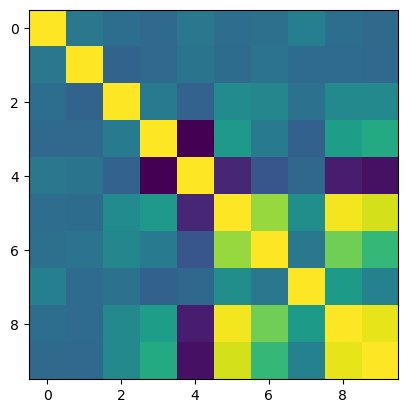

In [41]:
plt.imshow(D.corr())
plt.show()

In [42]:
D.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


In [43]:
def CreadorDummies(data,columna):
    temp=pd.get_dummies(data[columna])
    n=temp.shape[1]
    data=pd.concat([data,temp.iloc[:,:n-1]],axis=1)
    data=data.drop(columna,axis=1)
    return data

In [44]:
D1=CreadorDummies(D,'y')
D1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,no
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,1


In [45]:
D.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [46]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [47]:
D.drop('y',axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1


In [48]:
D.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [49]:
D.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [50]:
D.iloc[:,:2]

,age,job
0,30,blue-collar
1,39,services
2,25,services
3,38,services
4,47,admin.
...,...,...
4114,30,admin.
4115,39,admin.
4116,27,student
4117,58,admin.


In [51]:
D.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [52]:
D1.education=np.where(D1.education=='basic.4y','basic',D1.education)
D1.education=np.where(D1.education=='basic.6y','basic',D1.education)
D1.education=np.where(D1.education=='basic.9y','basic',D1.education)
D1.education=np.where(D1.education=='unknown','illiterate',D1.education)

In [53]:
D1.education.unique()

array(['basic', 'high.school', 'university.degree', 'professional.course',
       'illiterate'], dtype=object)

In [54]:
D2=CreadorDummies(D1,'education')
D2.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,no,basic,high.school,illiterate,professional.course
0,30,blue-collar,married,no,yes,no,cellular,may,fri,487,...,-1.8,92.893,-46.2,1.313,5099.1,1,1,0,0,0
1,39,services,single,no,no,no,telephone,may,fri,346,...,1.1,93.994,-36.4,4.855,5191.0,1,0,1,0,0
2,25,services,married,no,yes,no,telephone,jun,wed,227,...,1.4,94.465,-41.8,4.962,5228.1,1,0,1,0,0
3,38,services,married,no,unknown,unknown,telephone,jun,fri,17,...,1.4,94.465,-41.8,4.959,5228.1,1,1,0,0,0
4,47,admin.,married,no,yes,no,cellular,nov,mon,58,...,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0,0


In [55]:
D2.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [56]:
D2.job=np.where(D2.job=='blue-collar','services',D2.job)
D2.job=np.where(D2.job=='technician','services',D2.job)
D2.job=np.where(D2.job=='management','admin',D2.job)
D2.job=np.where(D2.job=='entrepreneur','self-employed',D2.job)
D2.job=np.where(D2.job=='housemaid','others',D2.job)
D2.job=np.where(D2.job=='unemployed','others',D2.job)
D2.job=np.where(D2.job=='unknown','others',D2.job)

In [57]:
D2.job.unique()

array(['services', 'admin.', 'self-employed', 'admin', 'student',
       'retired', 'others'], dtype=object)

In [58]:
D2.job=np.where(D2.job=='admin.','admin',D2.job)

In [59]:
D2.job.unique()

array(['services', 'admin', 'self-employed', 'student', 'retired',
       'others'], dtype=object)

In [60]:
D3=CreadorDummies(D2,'job')
D3.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,...,no,basic,high.school,illiterate,professional.course,admin,others,retired,self-employed,services
0,30,married,no,yes,no,cellular,may,fri,487,2,...,1,1,0,0,0,0,0,0,0,1
1,39,single,no,no,no,telephone,may,fri,346,4,...,1,0,1,0,0,0,0,0,0,1
2,25,married,no,yes,no,telephone,jun,wed,227,1,...,1,0,1,0,0,0,0,0,0,1
3,38,married,no,unknown,unknown,telephone,jun,fri,17,3,...,1,1,0,0,0,0,0,0,0,1
4,47,married,no,yes,no,cellular,nov,mon,58,1,...,1,0,0,0,0,1,0,0,0,0


In [61]:
D4=CreadorDummies(D3,'marital')
D5=CreadorDummies(D4,'housing')
D6=CreadorDummies(D5,'loan')

In [62]:
D6.head()

,age,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,retired,self-employed,services,divorced,married,single,no,unknown,no,unknown
0,30,no,cellular,may,fri,487,2,999,0,nonexistent,...,0,0,1,0,1,0,0,0,1,0
1,39,no,telephone,may,fri,346,4,999,0,nonexistent,...,0,0,1,0,0,1,1,0,1,0
2,25,no,telephone,jun,wed,227,1,999,0,nonexistent,...,0,0,1,0,1,0,0,0,1,0
3,38,no,telephone,jun,fri,17,3,999,0,nonexistent,...,0,0,1,0,1,0,0,1,0,1
4,47,no,cellular,nov,mon,58,1,999,0,nonexistent,...,0,0,0,0,1,0,0,0,1,0


In [63]:
D6.columns=['age', 'default', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'basic', 'high.school', 'illiterate', 'professional.course', 'admin',
       'others', 'retired', 'self-employed', 'services', 'divorced', 'married',
       'single', 'H_no', 'H_unknown', 'L_no', 'L_unknown']

In [64]:
D6.head()

,age,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,retired,self-employed,services,divorced,married,single,H_no,H_unknown,L_no,L_unknown
0,30,no,cellular,may,fri,487,2,999,0,nonexistent,...,0,0,1,0,1,0,0,0,1,0
1,39,no,telephone,may,fri,346,4,999,0,nonexistent,...,0,0,1,0,0,1,1,0,1,0
2,25,no,telephone,jun,wed,227,1,999,0,nonexistent,...,0,0,1,0,1,0,0,0,1,0
3,38,no,telephone,jun,fri,17,3,999,0,nonexistent,...,0,0,1,0,1,0,0,1,0,1
4,47,no,cellular,nov,mon,58,1,999,0,nonexistent,...,0,0,0,0,1,0,0,0,1,0


In [65]:
D6.y=1-D6.y


In [66]:
D6.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [67]:
LogR=LogisticRegression(solver='liblinear')
n=5
seleccion=RFE(LogR,n_features_to_select=n)

In [68]:
D6.columns

Index(['age', 'default', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'basic', 'high.school', 'illiterate', 'professional.course', 'admin',
       'others', 'retired', 'self-employed', 'services', 'divorced', 'married',
       'single', 'H_no', 'H_unknown', 'L_no', 'L_unknown'],
      dtype='object')

In [69]:
D6=D6.drop(['default', 'contact', 'month', 'day_of_week'],axis=1)
D6.head()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,retired,self-employed,services,divorced,married,single,H_no,H_unknown,L_no,L_unknown
0,30,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,...,0,0,1,0,1,0,0,0,1,0
1,39,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,...,0,0,1,0,0,1,1,0,1,0
2,25,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,...,0,0,1,0,1,0,0,0,1,0
3,38,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,...,0,0,1,0,1,0,0,1,0,1
4,47,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,...,0,0,0,0,1,0,0,0,1,0


In [70]:
D6=D6.drop('poutcome',axis=1)
D6.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,retired,self-employed,services,divorced,married,single,H_no,H_unknown,L_no,L_unknown
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,1,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,1,1,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,1,0,1,0,0,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,1,0,0,1,0,1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,0,1,0,0,0,1,0


In [71]:
X=D6.drop('y',axis=1)
Y=D6['y']
LogR2=seleccion.fit(X,Y)
LogR2

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=5)

In [72]:
LogR2.ranking_

array([21, 20, 10, 22,  1, 13, 16, 14,  1, 19,  1,  3, 15, 12, 17,  2,  1,
        1,  5,  6,  8, 18,  7,  9, 11,  4])

In [73]:
Elegidos=pd.DataFrame(
{
    'columna':X.columns,
    'elegido':LogR2.support_,
    'ranking':LogR2.ranking_
})
Elegidos

,columna,elegido,ranking
0,age,False,21
1,duration,False,20
2,campaign,False,10
3,pdays,False,22
4,previous,True,1
5,emp.var.rate,False,13
6,cons.price.idx,False,16
7,cons.conf.idx,False,14
8,euribor3m,True,1
9,nr.employed,False,19


In [74]:
X=D6[['previous','euribor3m','basic','retired','self-employed']]
X

,previous,euribor3m,basic,retired,self-employed
0,0,1.313,1,0,0
1,0,4.855,0,0,0
2,0,4.962,0,0,0
3,0,4.959,1,0,0
4,0,4.191,0,0,0
...,...,...,...,...,...
4114,0,4.958,1,0,0
4115,0,4.959,0,0,0
4116,1,1.354,0,0,0
4117,0,4.966,0,0,0


In [75]:
LogR3=LogisticRegression(solver='liblinear')
LogR3=LogR3.fit(X,Y)
LogR3.score(X,Y)

0.8941490653071134

In [76]:
D6.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [77]:
(3668-451)/3668

0.8770447110141767

In [78]:
Confusion=pd.crosstab(Y,LogR3.predict(X))
Confusion

col_0,0,1
y,,
0,3656,12
1,424,27


In [79]:
VN=Confusion[0][0]
VP=Confusion[1][1]
FN=Confusion[0][1]
FP=Confusion[1][0]

In [80]:
print('Exactitud:'+ str((VP+VN)/(VP+FP+VN+FN)))

Exactitud:0.8941490653071134


In [81]:
print('Taza de error:'+str((FP+FN)/(VP+FP+VN+FN)))

Taza de error:0.10585093469288662


In [82]:
print('Sensibilidad:'+str((VP)/(VP+FN)))

Sensibilidad:0.0598669623059867


In [83]:
print('Especificidad:'+str((VN)/(VN+FP)))

Especificidad:0.9967284623773174


In [84]:
print('Precision:'+str(VP/(VP+FP)))

Precision:0.6923076923076923


In [85]:
print('VPN:'+str(VN/(VN+FN)))

VPN:0.8960784313725491


In [86]:
Posis=D6[D6.y==1]
Negas=D6[D6.y==0]
len(Posis),len(Negas)

(451, 3668)

In [87]:
temp1=np.random.choice(range(len(Posis)), 300, replace=False)
temp2=np.random.choice(range(len(Negas)),300,replace=False)
D7=pd.concat([Posis.iloc[temp1,:],Negas.iloc[temp2,:]])
D7.shape

(600, 27)

In [88]:
D7.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,retired,self-employed,services,divorced,married,single,H_no,H_unknown,L_no,L_unknown
308,36,951,3,999,1,-1.8,92.893,-46.2,1.281,5099.1,...,0,0,1,0,1,0,1,0,1,0
2629,21,328,1,999,0,-3.4,92.431,-26.9,0.739,5017.5,...,0,0,0,0,0,1,1,0,1,0
1912,29,873,2,999,0,1.4,93.918,-42.7,4.957,5228.1,...,0,0,0,0,0,1,1,0,1,0
2299,33,1176,1,999,0,-1.8,93.075,-47.1,1.498,5099.1,...,0,0,0,0,0,1,0,0,0,0
2688,39,125,1,999,0,-3.4,92.431,-26.9,0.720,5017.5,...,0,0,1,0,0,1,1,0,0,0


In [89]:
D7.y

308     1
2629    1
1912    1
2299    1
2688    1
       ..
78      0
753     0
214     0
2334    0
346     0
Name: y, Length: 600, dtype: uint8

In [90]:
X=D7[['previous','euribor3m','basic','retired','self-employed']]
X

,previous,euribor3m,basic,retired,self-employed
308,1,1.281,1,0,0
2629,0,0.739,0,0,0
1912,0,4.957,0,0,0
2299,0,1.498,0,0,0
2688,0,0.720,0,0,0
...,...,...,...,...,...
78,0,4.959,1,0,0
753,0,4.967,1,1,0
214,1,1.291,0,0,0
2334,0,4.957,0,0,0


In [91]:
Y=D7['y']
Y

308     1
2629    1
1912    1
2299    1
2688    1
       ..
78      0
753     0
214     0
2334    0
346     0
Name: y, Length: 600, dtype: uint8

In [92]:
LogR4=LogisticRegression(solver='liblinear')
LogR4=LogR4.fit(X,Y)
LogR4.score(X,Y)

0.6983333333333334

In [93]:
Confusion=pd.crosstab(Y,LogR4.predict(X))
Confusion

col_0,0,1
y,,
0,208,92
1,89,211


In [94]:
VN=Confusion[0][0]
VP=Confusion[1][1]
FN=Confusion[0][1]
FP=Confusion[1][0]

In [95]:
print('Taza de error:'+str((FP+FN)/(VP+FP+VN+FN)))

Taza de error:0.3016666666666667


In [96]:
print('Sensibilidad:'+str((VP)/(VP+FN)))

Sensibilidad:0.7033333333333334


In [97]:
print('Especificidad:'+str((VN)/(VN+FP)))

Especificidad:0.6933333333333334


In [98]:
temp1=np.random.choice(range(len(Posis)), 400, replace=False)
temp2=np.random.choice(range(len(Negas)),400,replace=False)
D8=pd.concat([Posis.iloc[temp1,:],Negas.iloc[temp2,:]])
D8.shape

(800, 27)

In [99]:
X2=D8[['previous','euribor3m','basic','retired','self-employed']]
Y2=D8['y']

In [100]:
Confusion=pd.crosstab(Y2,LogR4.predict(X2))
Confusion

col_0,0,1
y,,
0,285,115
1,125,275


In [101]:
VN=Confusion[0][0]
VP=Confusion[1][1]
FN=Confusion[0][1]
FP=Confusion[1][0]

In [102]:
print('Exactitud:'+ str((VP+VN)/(VP+FP+VN+FN)))

Exactitud:0.7


In [103]:
print('Taza de error:'+str((FP+FN)/(VP+FP+VN+FN)))

Taza de error:0.3


In [104]:
print('Sensibilidad:'+str((VP)/(VP+FN)))

Sensibilidad:0.6875


In [105]:
print('Especificidad:'+str((VN)/(VN+FP)))

Especificidad:0.7125


¿ Qué es el overfitting, underfitting?

El underfitting es un error producido por un entrenamiento con poca cantidad de datos. Modelo sub-entrenado

El overfitting es un error que se produce por tener un entrenamiento con una población sesgada o por un sobre-entrenamiento de un modelo.

¿Como podemos estar seguros que nuestro modelo no esta en un overfitting?

Para evitar el overfitting el modelo debe ser calibrado y testeado. (Se divide normalmente en 2 datasets, una de calibración y otro de prueba).

Y para evitar contratiempos se puede tambien hacer una validación cruzada.

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [107]:
X=D6[['previous','euribor3m','basic','retired','self-employed']]
X

,previous,euribor3m,basic,retired,self-employed
0,0,1.313,1,0,0
1,0,4.855,0,0,0
2,0,4.962,0,0,0
3,0,4.959,1,0,0
4,0,4.191,0,0,0
...,...,...,...,...,...
4114,0,4.958,1,0,0
4115,0,4.959,0,0,0
4116,1,1.354,0,0,0
4117,0,4.966,0,0,0


In [108]:
Y=D6['y']
Y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: uint8

In [109]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [110]:
Xtrain.shape,Xtest.shape

((3295, 5), (824, 5))

In [111]:
logR5=LogisticRegression(solver='liblinear')
logR5=logR5.fit(Xtrain,Ytrain)
logR5.score(Xtest,Ytest), logR5.score(Xtrain,Ytrain)

(0.9029126213592233, 0.891350531107739)

In [112]:
scores=cross_val_score(LogisticRegression(solver='liblinear'),X,Y,scoring='accuracy',cv=10)
scores

array([0.89320388, 0.89563107, 0.90291262, 0.90048544, 0.89563107,
       0.88592233, 0.89320388, 0.88834951, 0.88592233, 0.88807786])

In [113]:
scores.mean()

0.8929339994803109

In [116]:
data=pd.read_csv('winequality-white.csv',sep=';')

In [117]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [118]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [119]:
data['calidad']=0
data.calidad=np.where(data['quality']==3,0,data.calidad)
data.calidad=np.where(data['quality']==4,0,data.calidad)
data.calidad=np.where(data['quality']==5,0,data.calidad)
data.calidad=np.where(data['quality']==6,0,data.calidad)
data.calidad=np.where(data['quality']==7,1,data.calidad)
data.calidad=np.where(data['quality']==8,1,data.calidad)
data.calidad=np.where(data['quality']==9,1,data.calidad)

In [120]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,calidad
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [121]:
logR6=LogisticRegression(solver='liblinear')
seleccion=RFE(logR6,n_features_to_select=6)
Y=data['calidad']
X=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
seleccion.fit(X,Y)
seleccion.ranking_

array([3, 1, 1, 4, 1, 5, 6, 1, 2, 1, 1])

In [122]:
pd.DataFrame(
{
    'Columna':X.columns,
    'Seleccion':seleccion.ranking_
})

,Columna,Seleccion
0,fixed acidity,3
1,volatile acidity,1
2,citric acid,1
3,residual sugar,4
4,chlorides,1
5,free sulfur dioxide,5
6,total sulfur dioxide,6
7,density,1
8,pH,2
9,sulphates,1


In [123]:
LogR7=LogisticRegression(solver='liblinear')
X=data[['volatile acidity','citric acid','chlorides','density','sulphates','alcohol']]


In [124]:
LogR7=LogR7.fit(X,Y)
LogR7.score(X,Y)

0.8003266639444672

In [125]:
confusion=pd.crosstab(Y,LogR7.predict(X))
confusion

col_0,0,1
calidad,,
0,3691,147
1,831,229


In [126]:
X1,X2,Y1,Y2=train_test_split(X,Y,test_size=0.25)

In [127]:
LogR8=LogisticRegression(solver='liblinear')
LogR8=LogR8.fit(X1,Y1)
LogR8.score(X2,Y2),LogR8.score(X1,Y1)

(0.806530612244898, 0.7985298121426627)

In [128]:
Y.sum(),len(Y)

(1060, 4898)

In [129]:
Posis=data[data.calidad==1]
Negas=data[data.calidad==0]
temp1=np.random.choice(range(len(Posis)),size=500,replace=False)
temp2=np.random.choice(range(len(Negas)),size=500,replace=False)
data2=pd.concat([Posis.iloc[temp1,:],Negas.iloc[temp2,:]])
data2.shape

(1000, 13)

In [130]:
X1=data2[['volatile acidity','citric acid','chlorides','density','sulphates','alcohol']]
Y1=data2['calidad']


In [131]:
Posis=data[data.calidad==1]
Negas=data[data.calidad==0]
temp1=np.random.choice(range(len(Posis)),size=700,replace=False)
temp2=np.random.choice(range(len(Negas)),size=700,replace=False)
data2=pd.concat([Posis.iloc[temp1,:],Negas.iloc[temp2,:]])
data2.shape

(1400, 13)

In [132]:
X2=data2[['volatile acidity','citric acid','chlorides','density','sulphates','alcohol']]
Y2=data2['calidad']

In [133]:
LogR9=LogisticRegression(solver='liblinear')
LogR9=LogR9.fit(X1,Y1)
LogR9.score(X2,Y2),LogR9.score(X1,Y1)

(0.7157142857142857, 0.711)

In [134]:
Confusion=pd.crosstab(Y2,LogR9.predict(X2))
Confusion

col_0,0,1
calidad,,
0,488,212
1,186,514


In [135]:
VN=Confusion[0][0]
VP=Confusion[1][1]
FN=Confusion[0][1]
FP=Confusion[1][0]

In [136]:
print('Sensibilidad:'+str((VP)/(VP+FN)))

Sensibilidad:0.7342857142857143


In [137]:
print('Especificidad:'+str((VN)/(VN+FP)))

Especificidad:0.6971428571428572
